In [1]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [3]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [4]:
single = load_data('COMPAS_Output_SSE.h5', 'SSE')
single_MS = restrict(single, 'type', 1, 1) #MS stars only

In [5]:
binary = load_data('COMPAS_Output_2.h5', 'BSE')
binary_merger = restrict(restrict(binary, 'type1', 1, 1), 'type2', 15, 15) #merger products only
binary_MS = restrict(restrict(binary, 'type1', 1, 1), 'type2', 1, 1) #MS stars only

binary1 = load_data('COMPAS_Output_1.h5', 'BSE')
binary_merger1 = restrict(restrict(binary1, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary3 = load_data('COMPAS_Output_3.h5', 'BSE')
binary_merger3 = restrict(restrict(binary3, 'type1', 1, 1), 'type2', 15, 15) #merger products only

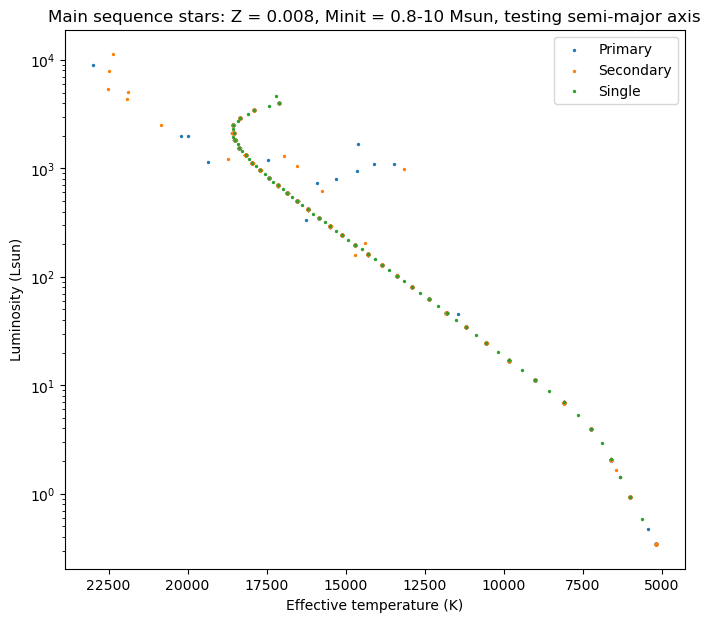

In [14]:
plt.figure(figsize=(8,7))
plt.scatter(binary_MS.Teff1, binary_MS.L1, label = 'Primary', s = 2)
plt.scatter(binary_MS.Teff2, binary_MS.L2, label = 'Secondary', s = 2)
#plt.scatter(binary_merger.Teff1, binary_merger.L1, label = 'Merger product: max_a = 2', s = 2)
#plt.scatter(binary_merger1.Teff1, binary_merger1.L1, label = 'Merger product: max_a = default', s = 2)
#plt.scatter(binary_merger3.Teff1, binary_merger3.L1, label = 'Merger product: max_a = 0.08', s = 2)
plt.scatter(single_MS.Teff, single_MS.L, label = 'Single', s = 2)
plt.gca().invert_xaxis()
plt.title('Main sequence stars: Z = 0.008, Minit = 0.8-10 Msun, testing semi-major axis')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [7]:
binary_t = load_data('COMPAS_Output_tide.h5', 'BSE')
binary_merger_t = restrict(restrict(binary_t, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary_tK = load_data('COMPAS_Output_tide_K.h5', 'BSE')
binary_merger_tK = restrict(restrict(binary_tK, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary_VLT = load_data('COMPAS_Output_VLT.h5', 'BSE')
binary_merger_VLT = restrict(restrict(binary_VLT, 'type1', 1, 1), 'type2', 15, 15) #merger products only

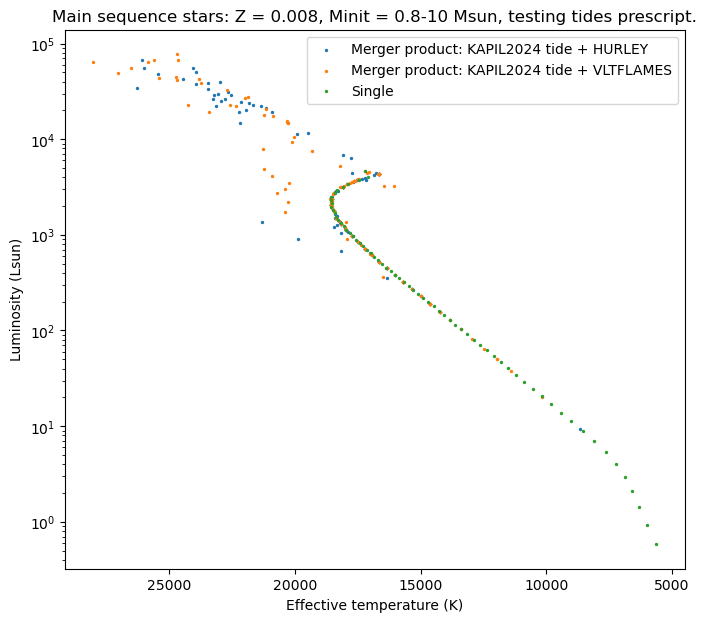

In [15]:
plt.figure(figsize=(8,7))
#plt.scatter(binary_merger3.Teff1, binary_merger3.L1, label = 'Merger product: max_a = 0.08', s = 2)
#plt.scatter(binary_merger_t.Teff1, binary_merger_t.L1, label = 'Merger product: PERFECT tide + HURLEY', s = 2)
plt.scatter(binary_merger_tK.Teff1, binary_merger_tK.L1, label = 'Merger product: KAPIL2024 tide + HURLEY', s = 2)
plt.scatter(binary_merger_VLT.Teff1, binary_merger_VLT.L1, label = 'Merger product: KAPIL2024 tide + VLTFLAMES', s = 2)
plt.scatter(single_MS.Teff, single_MS.L, label = 'Single', s = 2)
plt.gca().invert_xaxis()
plt.title('Main sequence stars: Z = 0.008, Minit = 0.8-10 Msun, testing tides prescript.')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [9]:
binary_l = load_data('COMPAS_Output_low.h5', 'BSE')
binary_merger_l = restrict(restrict(binary_l, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary_l2 = load_data('COMPAS_Output_low2.h5', 'BSE')
binary_merger_l2 = restrict(restrict(binary_l2, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary_l2_t = load_data('COMPAS_Output_low2_tide.h5', 'BSE')
binary_merger_l2_t = restrict(restrict(binary_l2_t, 'type1', 1, 1), 'type2', 15, 15) #merger products only

binary_l2_t_80 = load_data('COMPAS_Output_low2_tide_80.h5', 'BSE')
binary_merger_l2_t_80 = restrict(restrict(binary_l2_t_80, 'type1', 1, 1), 'type2', 15, 15) #merger products only

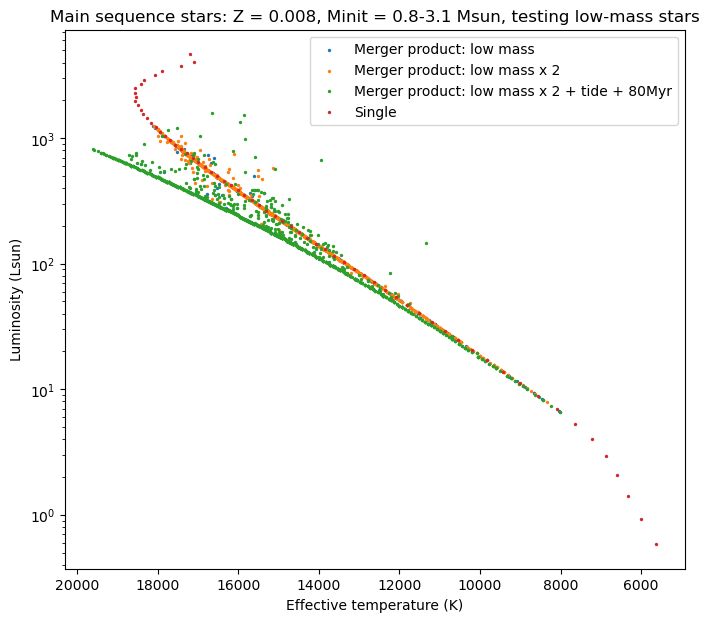

In [10]:
plt.figure(figsize=(8,7))
plt.scatter(binary_merger_l.Teff1, binary_merger_l.L1, label = 'Merger product: low mass', s = 2)
plt.scatter(binary_merger_l2.Teff1, binary_merger_l2.L1, label = 'Merger product: low mass x 2', s = 2)
plt.scatter(binary_merger_l2_t_80.Teff1, binary_merger_l2_t_80.L1, label = 'Merger product: low mass x 2 + tide + 80Myr', s = 2)
#plt.scatter(binary_merger_l2_t.Teff1, binary_merger_l2_t.L1, label = 'Merger product: low mass x 2 + tide', s = 2)
plt.scatter(single_MS.Teff, single_MS.L, label = 'Single', s = 2)
plt.gca().invert_xaxis()
plt.title('Main sequence stars: Z = 0.008, Minit = 0.8-3.1 Msun, testing low-mass stars')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [6]:
#binary_1mil = load_data(r'\\wsl.localhost\Ubuntu\home\minjih\2024\Honours\Research\COMPAS_Output_1mil.h5', 'BSE')
binary_1mil = load_data(r'/home/minjihkim/COMPAS/src/Initial_distribution/COMPAS_Output_1mil_copy.h5', 'BSE')
binary_merger_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 15, 15) #merger products only
merger_progenitor_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 0, 1)

In [ ]:
single_low = load_data('COMPAS_Output_SSE_M0.8to6.h5', 'SSE')
single_MS_low = restrict(single_low, 'type', 1, 1) #MS stars only

In [74]:
single_low_70 = load_data('COMPAS_Output_SSE_70Myr.h5', 'SSE')
single_MS_low_70 = restrict(single_low_70, 'type', 1, 1) #MS stars only

single_low_100 = load_data('COMPAS_Output_SSE_100Myr.h5', 'SSE')
single_MS_low_100 = restrict(single_low_100, 'type', 1, 1) #MS stars only

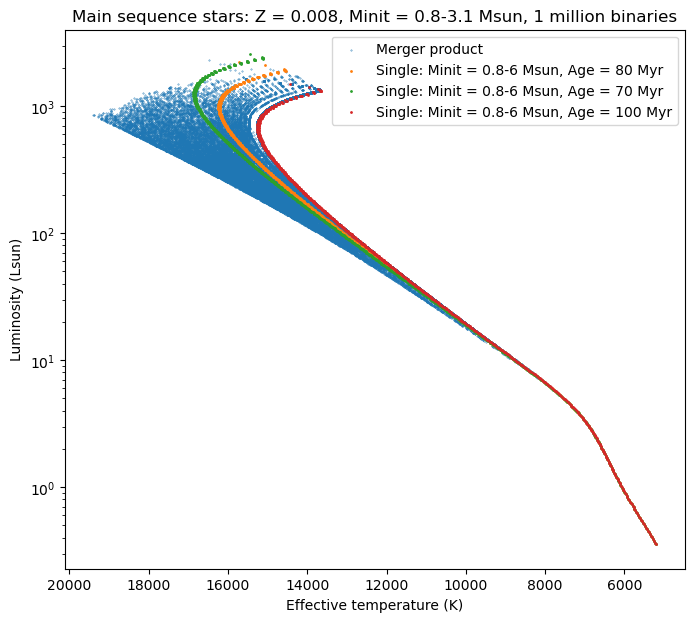

In [76]:
plt.figure(figsize=(8,7))
plt.scatter(binary_merger_1mil.Teff1, binary_merger_1mil.L1, label = 'Merger product', s = 0.1)
plt.scatter(single_MS_low.Teff, single_MS_low.L, label = 'Single: Minit = 0.8-6 Msun, Age = 80 Myr', s = 1)
plt.scatter(single_MS_low_70.Teff, single_MS_low_70.L, label = 'Single: Minit = 0.8-6 Msun, Age = 70 Myr', s = 1)
plt.scatter(single_MS_low_100.Teff, single_MS_low_100.L, label = 'Single: Minit = 0.8-6 Msun, Age = 100 Myr', s = 1)
plt.gca().invert_xaxis()
plt.title('Main sequence stars: Z = 0.008, Minit = 0.8-3.1 Msun, 1 million binaries')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [13]:
# plt.figure(figsize=(8,7))
# #plt.scatter(binary_MS.Teff1, binary_MS.L1, label = 'Primary', s = 2)
# #plt.scatter(binary_MS.Teff2, binary_MS.L2, label = 'Secondary', s = 2)
# #plt.scatter(binary_merger.Teff1, binary_merger.L1, label = 'Merger product: max_a = 2', s = 2)
# #plt.scatter(binary_merger1.Teff1, binary_merger1.L1, label = 'Merger product: max_a = default', s = 2)
# #plt.scatter(binary_merger3.Teff1, binary_merger3.L1, label = 'Merger product: max_a = 0.08', s = 2)
# #plt.scatter(binary_merger_t.Teff1, binary_merger_t.L1, label = 'Merger product: PERFECT tide', s = 2)
# #plt.scatter(binary_merger_tK.Teff1, binary_merger_tK.L1, label = 'Merger product: KAPIL2024 tide', s = 2)
# #plt.scatter(binary_merger_VLT.Teff1, binary_merger_VLT.L1, label = 'Merger product: KAPIL2024 tide + VLT', s = 2)
# #plt.scatter(binary_merger_l.Teff1, binary_merger_l.L1, label = 'Merger product: low mass', s = 2)
# plt.scatter(binary_merger_l2.Teff1, binary_merger_l2.L1, label = 'Merger product: low mass x 2', s = 2)
# #plt.scatter(binary_merger_l2_t_80.Teff1, binary_merger_l2_t_80.L1, label = 'Merger product: low mass x 2 + tide + 80Myr', s = 2)
# #plt.scatter(binary_merger_l2_t.Teff1, binary_merger_l2_t.L1, label = 'Merger product: low mass x 2 + tide', s = 2)
# plt.scatter(single_MS.Teff, single_MS.L, label = 'Single', s = 2)
# #plt.xlim((6000, 18000))
# plt.gca().invert_xaxis()
# plt.title('HRD')
# plt.xlabel('Effective temperature (K)')
# plt.ylabel('Luminosity (Lsun)')
# plt.yscale('log')
# plt.legend()
# #plt.ylim((np.min(single_MS.L), 1e2))